# Predicting House Prices by Multiple Regression with Closed Form

In this notebook, I will still use data on house sales in King County, where Seattle is located, to predict house prices by using **multiple regression with closed form**. We have applied simple linear regression with only one feature in previous notebook. Now we are going to include more features and see how multiple regression performs compared with what in simple linear regression.

In [1]:
# Import libraries to use
import numpy as np
import pandas as pd
#import os
#from sklearn.model_selection import train_test_split
import Regression

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load in House Sales Data

Dataset is from house sales in King County, the region where the city of Seattle, WA is located.

In [2]:
# Load the data
sales_train = pd.read_csv("dataset/kc_house_train_data.csv", dtype = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}
)
sales_test = pd.read_csv("dataset/kc_house_test_data.csv", dtype = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}
)
display(sales_train.T)

,0,1,2,3,4,5,6,7,8,9,...,17374,17375,17376,17377,17378,17379,17380,17381,17382,17383
id,7129300520,6414100192,5631500400,2487200875,1954400510,7237550310,1321400060,2008000270,2414600126,3793500160,...,0249000205,5100403806,0844000965,7852140040,9834201367,7936000429,2997800021,0263000018,0291310100,1523300157
date,20141013T000000,20141209T000000,20150225T000000,20141209T000000,20150218T000000,20140512T000000,20140627T000000,20150115T000000,20150415T000000,20150312T000000,...,20141015T000000,20150407T000000,20140626T000000,20140825T000000,20150126T000000,20150326T000000,20150219T000000,20140521T000000,20150116T000000,20141015T000000
price,221900,538000,180000,604000,510000,1.225e+06,257500,291850,229500,323000,...,1.537e+06,467000,224000,507250,429000,1.0075e+06,475000,360000,400000,325000
bedrooms,3,3,2,4,3,4,3,3,3,3,...,5,3,3,3,3,4,3,3,3,2
bathrooms,1,2.25,1,3,2,4.5,2.25,1.5,1,2.5,...,3.75,2.5,1.75,2.5,2,3.5,2.5,2.5,2.5,0.75
sqft_living,1180,2570,770,1960,1680,5420,1715,1060,1780,1890,...,4470,1425,1500,2270,1490,3510,1310,1530,1600,1020
sqft_lot,5650,7242,10000,5000,8080,101930,6819,9711,7470,6560,...,8088,1179,11968,5536,1126,7200,1294,1131,2388,1076
floors,1,2,1,1,1,1,2,1,1,2,...,2,3,1,2,3,2,2,3,2,2
waterfront,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
view,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
print('kc_house_train_data.csv has {} training samples, \
and kc_house_test_data.csv has {} test samples'.format(sales_train['id'].count(), sales_test['id'].count()))

kc_house_train_data.csv has 17384 training samples, and kc_house_test_data.csv has 4229 test samples


In [4]:
# Check data type in each field
print(sales_train.dtypes)

id                object
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot           int32
floors            object
waterfront         int32
view               int32
condition          int32
grade              int32
sqft_above         int32
sqft_basement      int32
yr_built           int32
yr_renovated       int32
zipcode           object
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
dtype: object


In [5]:
# Check whether there are Null values in training set
sales_train.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
# Check whether there are Null values in training set
sales_test.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Hence, there are no NULL values in training and test sets.

## 2. Exploring the data

In order to study the relations between numeric features of interest and price, we draw correlation heatmaps in the following.

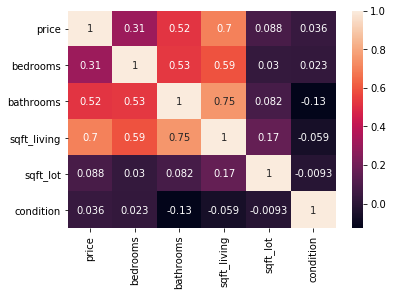

In [7]:
# Calculate correlations between target and features of interest
features = ['price','bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition']
corr = sales_train[features].corr()

# Heatmap
sns.heatmap(corr, annot=True)

From above correlation heatmaps, price has the positive correlations with size of house, or sqft_living, bathrooms, and bedrooms so we consider these three features in the following.

## 3. Computing Multiple Regression Parameters by Closed Form

The cost function of linear regression with multiple features is defined as

$$ J = \frac{1}{N}\sum_{i=1}^N (y^{(i)} - (b + \sum_{j = 1}^D w_j x_j^{(i)}))^2, $$

where there are $N$ samples and $D$ features. We can redefine $b$ as $w_0$ so the gradient of $J$ leads to

$$ \nabla_{\bf w} J = 
\begin{bmatrix}
-\frac{1}{N}\sum_{i=1}^N (y^{(i)} - (w_0 + \sum_{j=1}^D w_j x_j^{(i)}))\\
-\frac{1}{N}\sum_{i=1}^N (y^{(i)} - (w_0 + \sum_{j=1}^D w_j x_j^{(i)}))x_1^{(i)}\\
\vdots\\
-\frac{1}{N}\sum_{i=1}^N (y^{(i)} - (w_0 + \sum_{j=1}^D w_j x_j^{(i)}))x_k^{(i)}\\
\vdots\\
-\frac{1}{N}\sum_{i=1}^N (y^{(i)} - (w_0 + \sum_{j=1}^D w_j x_j^{(i)}))x_D^{(i)}
\end{bmatrix} = \frac{1}{N} {\bf X}^T ({\bf Y} - {\bf X} {\bf W}), \tag{1}$$

where ${\bf X}$, N by (D+1) matrix, $\bf W$, a (D+1) by 1 matrix, and $\bf Y$, an N by 1 matrix, are defined as

$$ {\bf X} = \begin{bmatrix} 
1 & x_1^{(1)} & \cdots & x_D^{(1)} \\
1 & \vdots    &\vdots  & \vdots    \\
1 & x_1^{(j)} & \cdots & x_D^{(j)} \\
1 & \vdots    & \vdots & \vdots    \\
1 & x_1^{(N)}  & \cdots & x_D^{(N)}
\end{bmatrix}, \qquad  {\bf W} = \begin{bmatrix} 
w_0 \\
w_1    \\
\vdots\\
w_D \end{bmatrix}, \qquad  {\bf Y} = \begin{bmatrix} 
y^{(1)} \\
\vdots\\
y^{(N)} \end{bmatrix}$$

Here $x_j^{(i)}$ denotes $j$-th feature in sample $i$.

To minimize the cost function $J$, we require

$$\nabla_{\bf w} J = 0 $$

Hence, we obtain the following equation to solve.

$$ {\bf X}^T ({\bf Y} - {\bf X} {\bf W}) = 0 \Rightarrow ({\bf X}^T {\bf X} ) {\bf W} = {\bf X}^T  {\bf Y} \Rightarrow \boxed{ {\bf W} = ({\bf X}^T {\bf X} )^{-1}{\bf X}^T  {\bf Y} }\tag{2}$$

Therefore, we can calculate all parameters in $\bf W$ from (2) but we have to calculate the inverse of matrix ${\bf X}^T {\bf X}$ first. We can use [linear algebra library](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.inv.html) in numpy to compute the inverse of a matrix.

### Learning a Multiple Regression Model

We can use the following code to learn a multiple regression model predicting 'price' based on the following features: `example_features = ['sqft_living', 'bedrooms', 'bathrooms']` on training data with the following code:

In [8]:
example_features = ['sqft_living', 'bedrooms', 'bathrooms']

# Convert dataframe into numpy array
X_train = np.c_[sales_train[example_features]]
Y_train = np.c_[sales_train['price']]

In [9]:
# Calculate linear regression parameters by closed form in (2)

# Create an object
model_exact = Regression.ExactLinearRegression()

In [10]:
# fit data to get parameters
parameters_exact = model_exact.multiple_linear_regression(X_train, Y_train)

### Compute Residual Sum of Squares (RSS)

We can now make predictions given by the model, let's compute the RSS on TEST data for the example model:

In [11]:
# Convert dataframe into numpy array
X_test = np.c_[sales_test[example_features]]
Y_test = np.c_[sales_test['price']]

# By using fitting parameters we obtained, predict house price with given example features
predictions_test = model_exact.predict(X_test, parameters_exact)

# Evaluate model by RSS
RSS = model_exact.scores(Y_test, predictions_test)
print("RSS when using example features on TEST data = %1.3e" % RSS)

RSS when using example features on TEST data = 2.738e+14


Recall that when considering only one feature, sqft_living, in simple linear regression model, RSS on TEST data is 2.754e+14. From above result, including multiple features into our model predicts a little bit better than simple linear regression model. 

## 4. Create Some New Features (Feature Engineering)

Although we often think of multiple regression as including multiple different features (e.g. # of bedrooms, squarefeet, and # of bathrooms) but we can also consider transformations of existing features e.g. the log of the squarefeet or even "interaction" features such as the product of bedrooms and bathrooms.

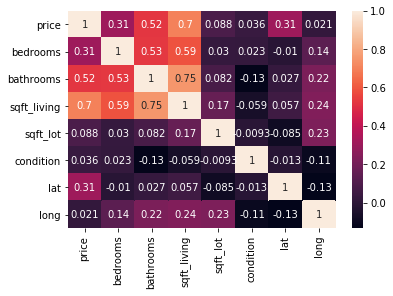

In [12]:
# Calculate correlations between target and features of interest
features_more = ['price','bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition','lat', 'long']
corr = sales_train[features_more].corr()

# Heatmap
sns.heatmap(corr, annot=True)

We create the following 4 new features as columns in both TEST and TRAIN data:
* bedrooms_squared = bedrooms\*bedrooms
* bed_bath_rooms = bedrooms\*bathrooms
* log_sqft_living = log(sqft_living)
* lat_plus_long = lat + long 

**Reasons:**
* Squaring bedrooms will increase the separation between not many bedrooms (e.g. 1) and lots of bedrooms (e.g. 4) since $1^2 = 1$ but $4^2 = 16$. Consequently, this feature will mostly affect houses with many bedrooms.

* As we can see in heatmap above, the bedrooms has highly positive correlation with not only target, price, but also bathrooms so we create the **interaction feature**, `bed_bath_rooms`, that is, bedrooms times bathrooms gives what's called an "interaction" feature. Moreover, if the house has many bedrooms, say 10 bedrooms, but only 2 bathrooms, it may cause lots of inconvenience to live in this house so the price of house may be lower. When *both* of them are large, the interaction feature is large such that the price may be also large.

* Taking the log of squarefeet has the effect of bringing large values closer together and spreading out small values.

* Adding latitude to longitude is totally non-sensical but we will see the reasons later.

In [13]:
# Create bedrroms_squared
sales_train['bedrooms_squared'] = sales_train['bedrooms'].apply(lambda x: x**2)
sales_test['bedrooms_squared'] = sales_test['bedrooms'].apply(lambda x: x**2)
display(sales_train.T)

,0,1,2,3,4,5,6,7,8,9,...,17374,17375,17376,17377,17378,17379,17380,17381,17382,17383
id,7129300520,6414100192,5631500400,2487200875,1954400510,7237550310,1321400060,2008000270,2414600126,3793500160,...,0249000205,5100403806,0844000965,7852140040,9834201367,7936000429,2997800021,0263000018,0291310100,1523300157
date,20141013T000000,20141209T000000,20150225T000000,20141209T000000,20150218T000000,20140512T000000,20140627T000000,20150115T000000,20150415T000000,20150312T000000,...,20141015T000000,20150407T000000,20140626T000000,20140825T000000,20150126T000000,20150326T000000,20150219T000000,20140521T000000,20150116T000000,20141015T000000
price,221900,538000,180000,604000,510000,1.225e+06,257500,291850,229500,323000,...,1.537e+06,467000,224000,507250,429000,1.0075e+06,475000,360000,400000,325000
bedrooms,3,3,2,4,3,4,3,3,3,3,...,5,3,3,3,3,4,3,3,3,2
bathrooms,1,2.25,1,3,2,4.5,2.25,1.5,1,2.5,...,3.75,2.5,1.75,2.5,2,3.5,2.5,2.5,2.5,0.75
sqft_living,1180,2570,770,1960,1680,5420,1715,1060,1780,1890,...,4470,1425,1500,2270,1490,3510,1310,1530,1600,1020
sqft_lot,5650,7242,10000,5000,8080,101930,6819,9711,7470,6560,...,8088,1179,11968,5536,1126,7200,1294,1131,2388,1076
floors,1,2,1,1,1,1,2,1,1,2,...,2,3,1,2,3,2,2,3,2,2
waterfront,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
view,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# Create bed_bath_rooms
sales_train['bed_bath_rooms'] = sales_train['bedrooms']*sales_train['bathrooms']
sales_test['bed_bath_rooms'] = sales_test['bedrooms']*sales_test['bathrooms']
display(sales_train.T)

,0,1,2,3,4,5,6,7,8,9,...,17374,17375,17376,17377,17378,17379,17380,17381,17382,17383
id,7129300520,6414100192,5631500400,2487200875,1954400510,7237550310,1321400060,2008000270,2414600126,3793500160,...,0249000205,5100403806,0844000965,7852140040,9834201367,7936000429,2997800021,0263000018,0291310100,1523300157
date,20141013T000000,20141209T000000,20150225T000000,20141209T000000,20150218T000000,20140512T000000,20140627T000000,20150115T000000,20150415T000000,20150312T000000,...,20141015T000000,20150407T000000,20140626T000000,20140825T000000,20150126T000000,20150326T000000,20150219T000000,20140521T000000,20150116T000000,20141015T000000
price,221900,538000,180000,604000,510000,1.225e+06,257500,291850,229500,323000,...,1.537e+06,467000,224000,507250,429000,1.0075e+06,475000,360000,400000,325000
bedrooms,3,3,2,4,3,4,3,3,3,3,...,5,3,3,3,3,4,3,3,3,2
bathrooms,1,2.25,1,3,2,4.5,2.25,1.5,1,2.5,...,3.75,2.5,1.75,2.5,2,3.5,2.5,2.5,2.5,0.75
sqft_living,1180,2570,770,1960,1680,5420,1715,1060,1780,1890,...,4470,1425,1500,2270,1490,3510,1310,1530,1600,1020
sqft_lot,5650,7242,10000,5000,8080,101930,6819,9711,7470,6560,...,8088,1179,11968,5536,1126,7200,1294,1131,2388,1076
floors,1,2,1,1,1,1,2,1,1,2,...,2,3,1,2,3,2,2,3,2,2
waterfront,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
view,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Create log_sqft_living
sales_train['log_sqft_living'] = sales_train['sqft_living'].apply(np.log)
sales_test['log_sqft_living'] = sales_test['sqft_living'].apply(np.log)
display(sales_train.T)

,0,1,2,3,4,5,6,7,8,9,...,17374,17375,17376,17377,17378,17379,17380,17381,17382,17383
id,7129300520,6414100192,5631500400,2487200875,1954400510,7237550310,1321400060,2008000270,2414600126,3793500160,...,0249000205,5100403806,0844000965,7852140040,9834201367,7936000429,2997800021,0263000018,0291310100,1523300157
date,20141013T000000,20141209T000000,20150225T000000,20141209T000000,20150218T000000,20140512T000000,20140627T000000,20150115T000000,20150415T000000,20150312T000000,...,20141015T000000,20150407T000000,20140626T000000,20140825T000000,20150126T000000,20150326T000000,20150219T000000,20140521T000000,20150116T000000,20141015T000000
price,221900,538000,180000,604000,510000,1.225e+06,257500,291850,229500,323000,...,1.537e+06,467000,224000,507250,429000,1.0075e+06,475000,360000,400000,325000
bedrooms,3,3,2,4,3,4,3,3,3,3,...,5,3,3,3,3,4,3,3,3,2
bathrooms,1,2.25,1,3,2,4.5,2.25,1.5,1,2.5,...,3.75,2.5,1.75,2.5,2,3.5,2.5,2.5,2.5,0.75
sqft_living,1180,2570,770,1960,1680,5420,1715,1060,1780,1890,...,4470,1425,1500,2270,1490,3510,1310,1530,1600,1020
sqft_lot,5650,7242,10000,5000,8080,101930,6819,9711,7470,6560,...,8088,1179,11968,5536,1126,7200,1294,1131,2388,1076
floors,1,2,1,1,1,1,2,1,1,2,...,2,3,1,2,3,2,2,3,2,2
waterfront,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
view,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# Create lat_plus_long
sales_train['lat_plus_long'] = sales_train['lat'] + sales_train['long']
sales_test['lat_plus_long'] = sales_test['lat'] + sales_test['long'] 
display(sales_train.T)

,0,1,2,3,4,5,6,7,8,9,...,17374,17375,17376,17377,17378,17379,17380,17381,17382,17383
id,7129300520,6414100192,5631500400,2487200875,1954400510,7237550310,1321400060,2008000270,2414600126,3793500160,...,0249000205,5100403806,0844000965,7852140040,9834201367,7936000429,2997800021,0263000018,0291310100,1523300157
date,20141013T000000,20141209T000000,20150225T000000,20141209T000000,20150218T000000,20140512T000000,20140627T000000,20150115T000000,20150415T000000,20150312T000000,...,20141015T000000,20150407T000000,20140626T000000,20140825T000000,20150126T000000,20150326T000000,20150219T000000,20140521T000000,20150116T000000,20141015T000000
price,221900,538000,180000,604000,510000,1.225e+06,257500,291850,229500,323000,...,1.537e+06,467000,224000,507250,429000,1.0075e+06,475000,360000,400000,325000
bedrooms,3,3,2,4,3,4,3,3,3,3,...,5,3,3,3,3,4,3,3,3,2
bathrooms,1,2.25,1,3,2,4.5,2.25,1.5,1,2.5,...,3.75,2.5,1.75,2.5,2,3.5,2.5,2.5,2.5,0.75
sqft_living,1180,2570,770,1960,1680,5420,1715,1060,1780,1890,...,4470,1425,1500,2270,1490,3510,1310,1530,1600,1020
sqft_lot,5650,7242,10000,5000,8080,101930,6819,9711,7470,6560,...,8088,1179,11968,5536,1126,7200,1294,1131,2388,1076
floors,1,2,1,1,1,1,2,1,1,2,...,2,3,1,2,3,2,2,3,2,2
waterfront,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
view,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In what follows, we calculate the mean (arithmetic average) value of 4 new features on TEST data.

In [17]:
# Check 
new_features = ['bedrooms_squared', 'bed_bath_rooms', 'log_sqft_living', 'lat_plus_long']
sales_test[new_features].mean(axis=0)

bedrooms_squared    12.446678
bed_bath_rooms       7.503902
log_sqft_living      7.550275
lat_plus_long      -74.653334
dtype: float64

## 5. Learning from Multiple Models

We will learn the weights for three (nested) models for predicting house prices. The first model will have the fewest features, the second model will add one more feature, and the third will add a few more:

- Model 1: squarefeet, # bedrooms, # bathrooms, latitude & longitude
- Model 2: Add bedrooms\*bathrooms
- Model 3: Add log squarefeet, bedrooms squared, and the (nonsensical) latitude + longitude

In [18]:
# Select features for these three models
model_1_features = ['sqft_living', 'bedrooms', 'bathrooms', 'lat', 'long']
model_2_features = model_1_features + ['bed_bath_rooms']
model_3_features = model_2_features + ['bedrooms_squared', 'log_sqft_living', 'lat_plus_long']

In [19]:
# Convert dataframe into numpy array
X_train_1 = np.c_[sales_train[model_1_features]]
X_train_2 = np.c_[sales_train[model_2_features]]
X_train_3 = np.c_[sales_train[model_3_features]]
Y_train = np.c_[sales_train['price']]

### Model 1:  squarefeet, # bedrooms, # bathrooms, latitude & longitude

In [20]:
# Calculate linear regression parameters by closed form in (2)

# Create an object
model_1_exact = Regression.ExactLinearRegression()

# fit data to get parameters
parameters_1_exact = model_1_exact.multiple_linear_regression(X_train_1, Y_train)

### Model 2:  squarefeet, # bedrooms, # bathrooms, latitude & longitude, bed_bath_rooms

In [25]:
# Calculate linear regression parameters by closed form in (2)

# Create an object
model_2_exact = Regression.ExactLinearRegression()

# fit data to get parameters
parameters_2_exact = model_2_exact.multiple_linear_regression(X_train_2, Y_train)

In [27]:
# Compare the coefficient/weight of bathrooms in model 1 and 2
print('The coefficient/weight for "bathrooms" in model 1 is {}.'.format(np.squeeze(parameters_1_exact['W'][2])))
print('The coefficient/weight for "bathrooms" in model 2 is {}.'.format(np.squeeze(parameters_2_exact['W'][2])))
print('The coefficient/weight for "bed_bath_rooms" in model 2 is {}.'.format(np.squeeze(parameters_2_exact['W'][-1])))

The coefficient/weight for "bathrooms" in model 1 is 15706.742082938552.
The coefficient/weight for "bathrooms" in model 2 is -71461.30828729272.
The coefficient/weight for "bed_bath_rooms" in model 2 is 25579.651999510825.


From above results, we can see that the sign for the weight for "bathrooms" in Model 1 and 2 are different. Why does this be the case? Let's consider the following simple example to explain this:

$$ y = w_0 + w_1* x_1 + w_2 * x_2. $$

Now if we add an interaction feature, say $x_1*x_2$, then we have

$$ \tilde{y} = w_0' + w_1'* x_1 + w_2' * x_2 + w_3' * x_1*x_2.$$

Since ideally the prediction of house price for the same house must be the same on training data, or model independent, $y = \tilde{y}$. With this requirement, we can see that $w_0 = w_0'$ if $x_1 = x_2 = 0$. Hence, we have the following identity,

$$ w_1* x_1 + w_2 * x_2 = w_1'* x_1 + w_2' * x_2 + w_3' * x_1*x_2 .$$

If we make further assumption, $w_1 = w_1'$, then the above equation leads to

$$ w_2 * x_2 =  w_2' * x_2 + w_3' * x_1*x_2  $$

Since the values for bathrooms ($x_2$) and bedrooms ($x_1$) are always positive, and $x_1*x_2 > x_2$, if $w_3' > w_2 > 0$, then $w_2'$ must be negative such that the above identity still hold!

### Model 3:  squarefeet, # bedrooms, # bathrooms, latitude & longitude, bed_bath_rooms, bedrooms_squared, log_sqft_living, lat_plus_long

In [28]:
# Calculate linear regression parameters by closed form in (2)

# Create an object
model_3_exact = Regression.ExactLinearRegression()

# fit data to get parameters
parameters_3_exact = model_3_exact.multiple_linear_regression(X_train_3, Y_train)

## 6. Evaluating Multiple Models

Now we've learned three models and extracted the model weights we want to evaluate which model is best.

First, we compute the RSS on TRAINING data for each of the three models.

In [30]:
# Compute the RSS on TRAINING data for each of the three models and record the values:

# By using fitting parameters we obtained, predict house price with given example features
predictions_1_train = model_1_exact.predict(X_train_1, parameters_1_exact)

# Evaluate model by RSS
RSS1 = model_1_exact.scores(Y_train, predictions_1_train)
print("RSS when using features in model 1 on training data = %1.3e" % RSS1)


RSS when using features in model 1 on training data = 9.679e+14


In [31]:
# Compute the RSS on TRAINING data for each of the three models and record the values:

# By using fitting parameters we obtained, predict house price with given example features
predictions_2_train = model_2_exact.predict(X_train_2, parameters_2_exact)

# Evaluate model by RSS
RSS2 = model_2_exact.scores(Y_train, predictions_2_train)
print("RSS when using features in model 2 on training data = %1.3e" % RSS2)


RSS when using features in model 2 on training data = 9.584e+14


In [32]:
# Compute the RSS on TRAINING data for each of the three models and record the values:

# By using fitting parameters we obtained, predict house price with given example features
predictions_3_train = model_3_exact.predict(X_train_3, parameters_3_exact)

# Evaluate model by RSS
RSS3 = model_3_exact.scores(Y_train, predictions_3_train)
print("RSS when using features in model 3 on training data = %1.3e" % RSS3)


RSS when using features in model 3 on training data = 9.282e+14


From above results, we can see that the model 3 has the lowest RSS on TRAINING data.

## 7. Test Models on Test Data

In [33]:
# Convert dataframe into numpy array
X_test_1 = np.c_[sales_test[model_1_features]]
X_test_2 = np.c_[sales_test[model_2_features]]
X_test_3 = np.c_[sales_test[model_3_features]]
Y_test = np.c_[sales_test['price']]

### Prediction by Model 1 on test data

In [34]:
# Prediction by Model 1 on test data

# By using fitting parameters we obtained, predict house price with given example features
predictions_1_test = model_1_exact.predict(X_test_1, parameters_1_exact)

# Evaluate model by RSS
RSS1_test = model_1_exact.scores(Y_test, predictions_1_test)
print("RSS when using features in model 1 on test data = %1.3e" % RSS1_test)


RSS when using features in model 1 on test data = 2.255e+14


### Prediction by Model 2 on test data

In [35]:
# Prediction by Model 2 on test data

# By using fitting parameters we obtained, predict house price with given example features
predictions_2_test = model_2_exact.predict(X_test_2, parameters_2_exact)

# Evaluate model by RSS
RSS2_test = model_2_exact.scores(Y_test, predictions_2_test)
print("RSS when using features in model 2 on test data = %1.3e" % RSS2_test)


RSS when using features in model 2 on test data = 2.234e+14


### Prediction by Model 3 on test data

In [36]:
# Prediction by Model 3 on test data

# By using fitting parameters we obtained, predict house price with given example features
predictions_3_test = model_3_exact.predict(X_test_3, parameters_3_exact)

# Evaluate model by RSS
RSS3_test = model_3_exact.scores(Y_test, predictions_3_test)
print("RSS when using features in model 3 on test data = %1.3e" % RSS3_test)

RSS when using features in model 3 on test data = 2.660e+14


From above results, model 2 has the lowest RSS on TESTING data. However, model 3 has the lowest RSS on TRAINING data. This implies that model 3 with the most features is overfitting so this model does not generalize well to testing data. Compared to RSS on testing data by using simple linear regression, including more features here leads to lower RSS. Hence, **multiple regression can predict house prices more accurately but one has to be aware of the issue of overfitting**.